In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [120]:
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [23]:
import pandas as pd
df = pd.read_csv('iris.data')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
print df.head()

   sepal_length  sepal_width  petal_length  petal_width        class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa


In [25]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:, :4]

df.iloc[:, 4] = df.iloc[:, 4].astype('category')
cats = df.select_dtypes(['category']).columns
df[cats] = df[cats].apply(lambda x: x.cat.codes)
y = df.iloc[:, 4]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int8

In [145]:
list_acc = []
list_acc_knn = []
indices = range(1, 7)

for i in range(1, 7):
    X_tr, X_te, Y_tr, Y_te = train_test_split(X, y, test_size=i/10., random_state=4)
    
    lr.fit(X_tr, Y_tr)
    knn.fit(X_tr, Y_tr)
    
    preds = lr.predict(X_te)
    preds_knn = knn.predict(X_te)
    
    acc = sum([int(p==r) for p, r in zip(preds, Y_te)]) / float(len(preds))
    acc_knn = sum([int(p==r) for p, r in zip(preds_knn, Y_te)]) / float(len(preds))
    
    list_acc.append(acc)
    list_acc_knn.append(acc_knn)

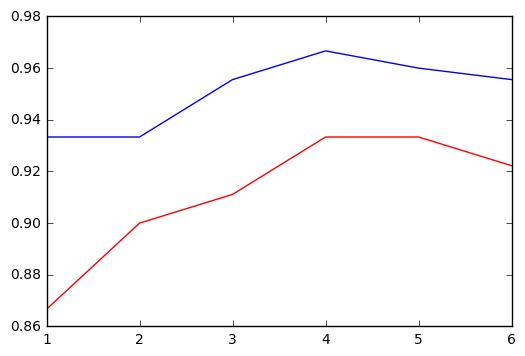

In [146]:
import matplotlib.pyplot as plt
plt.plot(indices, list_acc, 'red', indices, list_acc_knn, 'blue')
plt.show()

0.8